#  Video Popularity Analysis:


Problem Statement: Determine the factors that influence a video's popularity.

Questions to Answer: What are the trends in view counts, likes, dislikes, and comments? Are there correlations between these metrics and the video's category or the publishing date?

 # Importing Libraries:

In [1]:
# Importing Libraries:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

# Loading Dataset:

In [2]:
# Loading Dataset:
import pandas as pd

# Load the CSV file with the 'latin1' encoding
india_df = pd.read_csv('IN_youtube_trending_data.csv', encoding='latin1')

# Load the first few rows of a file
india_df.head()






,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,10,2020-08-12T00:00:00Z,[None],11308046,655450,33242,405146,https://i.ytimg.com/vi/x-KbnJ9fvJc/default.jpg,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...
2,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296533,6179,30058,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...
3,UsMRgnTcchY,Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...,2020-08-10T05:30:49Z,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,10,2020-08-12T00:00:00Z,hindi songs|2020 hindi songs|2020 new songs|t-...,23564512,743931,84162,136942,https://i.ytimg.com/vi/UsMRgnTcchY/default.jpg,False,False,Gulshan Kumar and T-Series presents Bhushan Ku...
4,WNSEXJJhKTU,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11T05:30:13Z,UCye6Oz0mg46S362LwARGVcA,VYRLOriginals,10,2020-08-12T00:00:00Z,VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...,6783649,268817,8798,22984,https://i.ytimg.com/vi/WNSEXJJhKTU/default.jpg,False,False,VYRL Originals brings to you âBaarishâ - t...


 # Exploratory Data Analysis (EDA)

In [3]:
# general information
india_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220921 entries, 0 to 220920
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           220921 non-null  object
 1   title              220921 non-null  object
 2   publishedAt        220921 non-null  object
 3   channelId          220921 non-null  object
 4   channelTitle       220920 non-null  object
 5   categoryId         220921 non-null  int64 
 6   trending_date      220921 non-null  object
 7   tags               220921 non-null  object
 8   view_count         220921 non-null  int64 
 9   likes              220921 non-null  int64 
 10  dislikes           220921 non-null  int64 
 11  comment_count      220921 non-null  int64 
 12  thumbnail_link     220921 non-null  object
 13  comments_disabled  220921 non-null  bool  
 14  ratings_disabled   220921 non-null  bool  
 15  description        202549 non-null  object
dtypes: bool(2), int64(5)

In [4]:
 # Summary statistics
india_df.describe() 


,categoryId,view_count,likes,dislikes,comment_count
count,220921.000000,2.209210e+05,2.209210e+05,2.209210e+05,2.209210e+05
mean,20.849544,2.895213e+06,1.468311e+05,2.653852e+03,8.784114e+03
std,6.044239,7.089427e+06,4.049589e+05,7.678115e+04,7.442354e+04
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,20.000000,4.012340e+05,1.347600e+04,0.000000e+00,3.660000e+02
50%,24.000000,9.959170e+05,4.049800e+04,0.000000e+00,1.198000e+03
75%,24.000000,2.535156e+06,1.243660e+05,9.810000e+02,4.197000e+03
max,29.000000,2.644074e+08,1.611524e+07,1.234147e+07,6.738565e+06


In [5]:
# give the number of rows and columns
india_df.shape


(220921, 16)

In [6]:
# extract all columns of the dataset
india_df.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description'],
      dtype='object')

In [7]:
# check for null values
india_df.isna().sum()

video_id                 0
title                    0
publishedAt              0
channelId                0
channelTitle             1
categoryId               0
trending_date            0
tags                     0
view_count               0
likes                    0
dislikes                 0
comment_count            0
thumbnail_link           0
comments_disabled        0
ratings_disabled         0
description          18372
dtype: int64

In [8]:
 # Fill missing values with a specific value
india_df.fillna("not known") 

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,10,2020-08-12T00:00:00Z,[None],11308046,655450,33242,405146,https://i.ytimg.com/vi/x-KbnJ9fvJc/default.jpg,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...
2,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296533,6179,30058,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...
3,UsMRgnTcchY,Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...,2020-08-10T05:30:49Z,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,10,2020-08-12T00:00:00Z,hindi songs|2020 hindi songs|2020 new songs|t-...,23564512,743931,84162,136942,https://i.ytimg.com/vi/UsMRgnTcchY/default.jpg,False,False,Gulshan Kumar and T-Series presents Bhushan Ku...
4,WNSEXJJhKTU,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11T05:30:13Z,UCye6Oz0mg46S362LwARGVcA,VYRLOriginals,10,2020-08-12T00:00:00Z,VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...,6783649,268817,8798,22984,https://i.ytimg.com/vi/WNSEXJJhKTU/default.jpg,False,False,VYRL Originals brings to you âBaarishâ - t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220916,Zl8alBdIfpg,NEW! Barsatein - Mausam Pyar Ka - Ep 74 | 19 O...,2023-10-19T15:00:33Z,UCpEhnqL0y41EpW2TvWAHD7Q,SET India,24,2023-10-22T00:00:00Z,Shivangi Joshi|Barsatein serial|hindi tv show|...,1343416,20131,0,377,https://i.ytimg.com/vi/Zl8alBdIfpg/default.jpg,False,False,Click here to Subscribe to SET India: https://...
220917,LIsfMO5Jd_w,NAPOLEON - Official Trailer #2 (HD),2023-10-18T12:59:40Z,UCz97F7dMxBNOfGYu3rx8aCw,Sony Pictures Entertainment,24,2023-10-22T00:00:00Z,[None],12596431,90780,0,5901,https://i.ytimg.com/vi/LIsfMO5Jd_w/default.jpg,False,False,Joaquin Phoenix takes the crown. Watch the new...
220918,RYI12J1nz4A,KING - NEW LIFE | Full Album,2023-10-17T18:30:25Z,UCrtOnzd9dWH9lXTAB-64Hfg,King,10,2023-10-22T00:00:00Z,KING|New Life|Album|Indian Pop|Pop|MTV Hustle|...,387955,39139,0,4466,https://i.ytimg.com/vi/RYI12J1nz4A/default.jpg,False,False,#KING #NEWLIFEKINGâs latest album âNEW LIF...
220919,fhf7lDNrUus,Ghost | Second OGM | Dr.Shivarajkumar | Anupam...,2023-10-17T13:30:02Z,UCovxnbWKPCA5iJDxa9zbBew,T-Series Kannada,10,2023-10-22T00:00:00Z,Kannada songs 2023|Kannada songs new|Kannada m...,1404087,48247,0,4082,https://i.ytimg.com/vi/fhf7lDNrUus/default.jpg,False,False,"This action packed heist thriller, directed by..."


In [9]:
# To check skewness of the views
india_df["view_count"].skew()

9.180066861968834

In [10]:
# Check unique values of channel Title & tags
india_df["channelTitle"].unique()

array(['FoxStarHindi', 'Rehaan Records', 'Diljit Dosanjh', ...,
       'Ajith Vinayaka Films', 'Malik Vlogs', 'Dante Hindustani Shorts'],
      dtype=object)

In [11]:
india_df["tags"].unique()

array(['sadak|sadak 2|mahesh bhatt|vishesh films|pooja bhatt|alia bhatt|sanjay dutt|aditya roy kapur|alia bhatt movies|alia bhatt new movies|aditya roy kapur new movies|aditya roy kapur movies|sanjay dutt sadak 2|sanjay dutt sadak|sanjay dutt new movies|fox star studios|fox star hindi|disney plus hotstar|disney plus movie|bollywood|cinema|movie|hindi cinema|upcoming bollywood movie|love story|action|thriller|suspense',
       '[None]',
       'clash diljit dosanjh|diljit dosanjh|diljit dosanjh goat album|diljit dosanjh new album|punjabi songs 2020|punjabi new song|new song 2020|goat diljit dosanjh|the kidd punjabi music|the kidd music|raj ranjodh songs|goat diljit dosanjh full album|diljit dosanjh karan aujla song|Diljit dosanjh new songs|diljit dosanjh songs|goat diljit dosanjh 2020|goat 2020|latest punjabi songs 2020|punajbi 2020 latest songs|punjabi songs|punjabi|new songs punjabi|clash',
       ...,
       'monkey magic|monkey magic new series|melodies of india|monkey magic travel 

In [12]:
# Replace the null values 
india_df["channelTitle"].fillna("unknown", inplace = True)
india_df["tags"].fillna("none", inplace = True)

In [13]:
# check for null values
india_df.isna().sum()

video_id                 0
title                    0
publishedAt              0
channelId                0
channelTitle             0
categoryId               0
trending_date            0
tags                     0
view_count               0
likes                    0
dislikes                 0
comment_count            0
thumbnail_link           0
comments_disabled        0
ratings_disabled         0
description          18372
dtype: int64

In [14]:
# Check for duplicate values
india_df.duplicated().sum()

75

In [15]:
 # Remove duplicate rows
india_df.drop_duplicates() 


,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,10,2020-08-12T00:00:00Z,[None],11308046,655450,33242,405146,https://i.ytimg.com/vi/x-KbnJ9fvJc/default.jpg,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...
2,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296533,6179,30058,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...
3,UsMRgnTcchY,Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...,2020-08-10T05:30:49Z,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,10,2020-08-12T00:00:00Z,hindi songs|2020 hindi songs|2020 new songs|t-...,23564512,743931,84162,136942,https://i.ytimg.com/vi/UsMRgnTcchY/default.jpg,False,False,Gulshan Kumar and T-Series presents Bhushan Ku...
4,WNSEXJJhKTU,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11T05:30:13Z,UCye6Oz0mg46S362LwARGVcA,VYRLOriginals,10,2020-08-12T00:00:00Z,VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...,6783649,268817,8798,22984,https://i.ytimg.com/vi/WNSEXJJhKTU/default.jpg,False,False,VYRL Originals brings to you âBaarishâ - t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220916,Zl8alBdIfpg,NEW! Barsatein - Mausam Pyar Ka - Ep 74 | 19 O...,2023-10-19T15:00:33Z,UCpEhnqL0y41EpW2TvWAHD7Q,SET India,24,2023-10-22T00:00:00Z,Shivangi Joshi|Barsatein serial|hindi tv show|...,1343416,20131,0,377,https://i.ytimg.com/vi/Zl8alBdIfpg/default.jpg,False,False,Click here to Subscribe to SET India: https://...
220917,LIsfMO5Jd_w,NAPOLEON - Official Trailer #2 (HD),2023-10-18T12:59:40Z,UCz97F7dMxBNOfGYu3rx8aCw,Sony Pictures Entertainment,24,2023-10-22T00:00:00Z,[None],12596431,90780,0,5901,https://i.ytimg.com/vi/LIsfMO5Jd_w/default.jpg,False,False,Joaquin Phoenix takes the crown. Watch the new...
220918,RYI12J1nz4A,KING - NEW LIFE | Full Album,2023-10-17T18:30:25Z,UCrtOnzd9dWH9lXTAB-64Hfg,King,10,2023-10-22T00:00:00Z,KING|New Life|Album|Indian Pop|Pop|MTV Hustle|...,387955,39139,0,4466,https://i.ytimg.com/vi/RYI12J1nz4A/default.jpg,False,False,#KING #NEWLIFEKINGâs latest album âNEW LIF...
220919,fhf7lDNrUus,Ghost | Second OGM | Dr.Shivarajkumar | Anupam...,2023-10-17T13:30:02Z,UCovxnbWKPCA5iJDxa9zbBew,T-Series Kannada,10,2023-10-22T00:00:00Z,Kannada songs 2023|Kannada songs new|Kannada m...,1404087,48247,0,4082,https://i.ytimg.com/vi/fhf7lDNrUus/default.jpg,False,False,"This action packed heist thriller, directed by..."


In [16]:
# Renaming the columns
india_df.rename(columns={'view_count': 'views'}, inplace=True)
india_df.columns # to check the columns names

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'views', 'likes', 'dislikes',
       'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description'],
      dtype='object')

In [17]:
#Saving the cleaned Data
india_df.to_csv('cleaned_data.csv', index=False)


# Time Series Analysis

In [18]:
# Import Necessary libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [19]:
# Load your data:

# Replace 'your_data.csv' with the actual file path
india_df = pd.read_csv('IN_youtube_trending_data.csv', encoding='latin1')

# Ensure that the date columns are in datetime format
india_df['publishedAt'] = pd.to_datetime(india_df['publishedAt'])
india_df['trending_date'] = pd.to_datetime(india_df['trending_date'])

# Set the date column as the index, which is important for time series analysis
india_df.set_index('publishedAt', inplace=True)




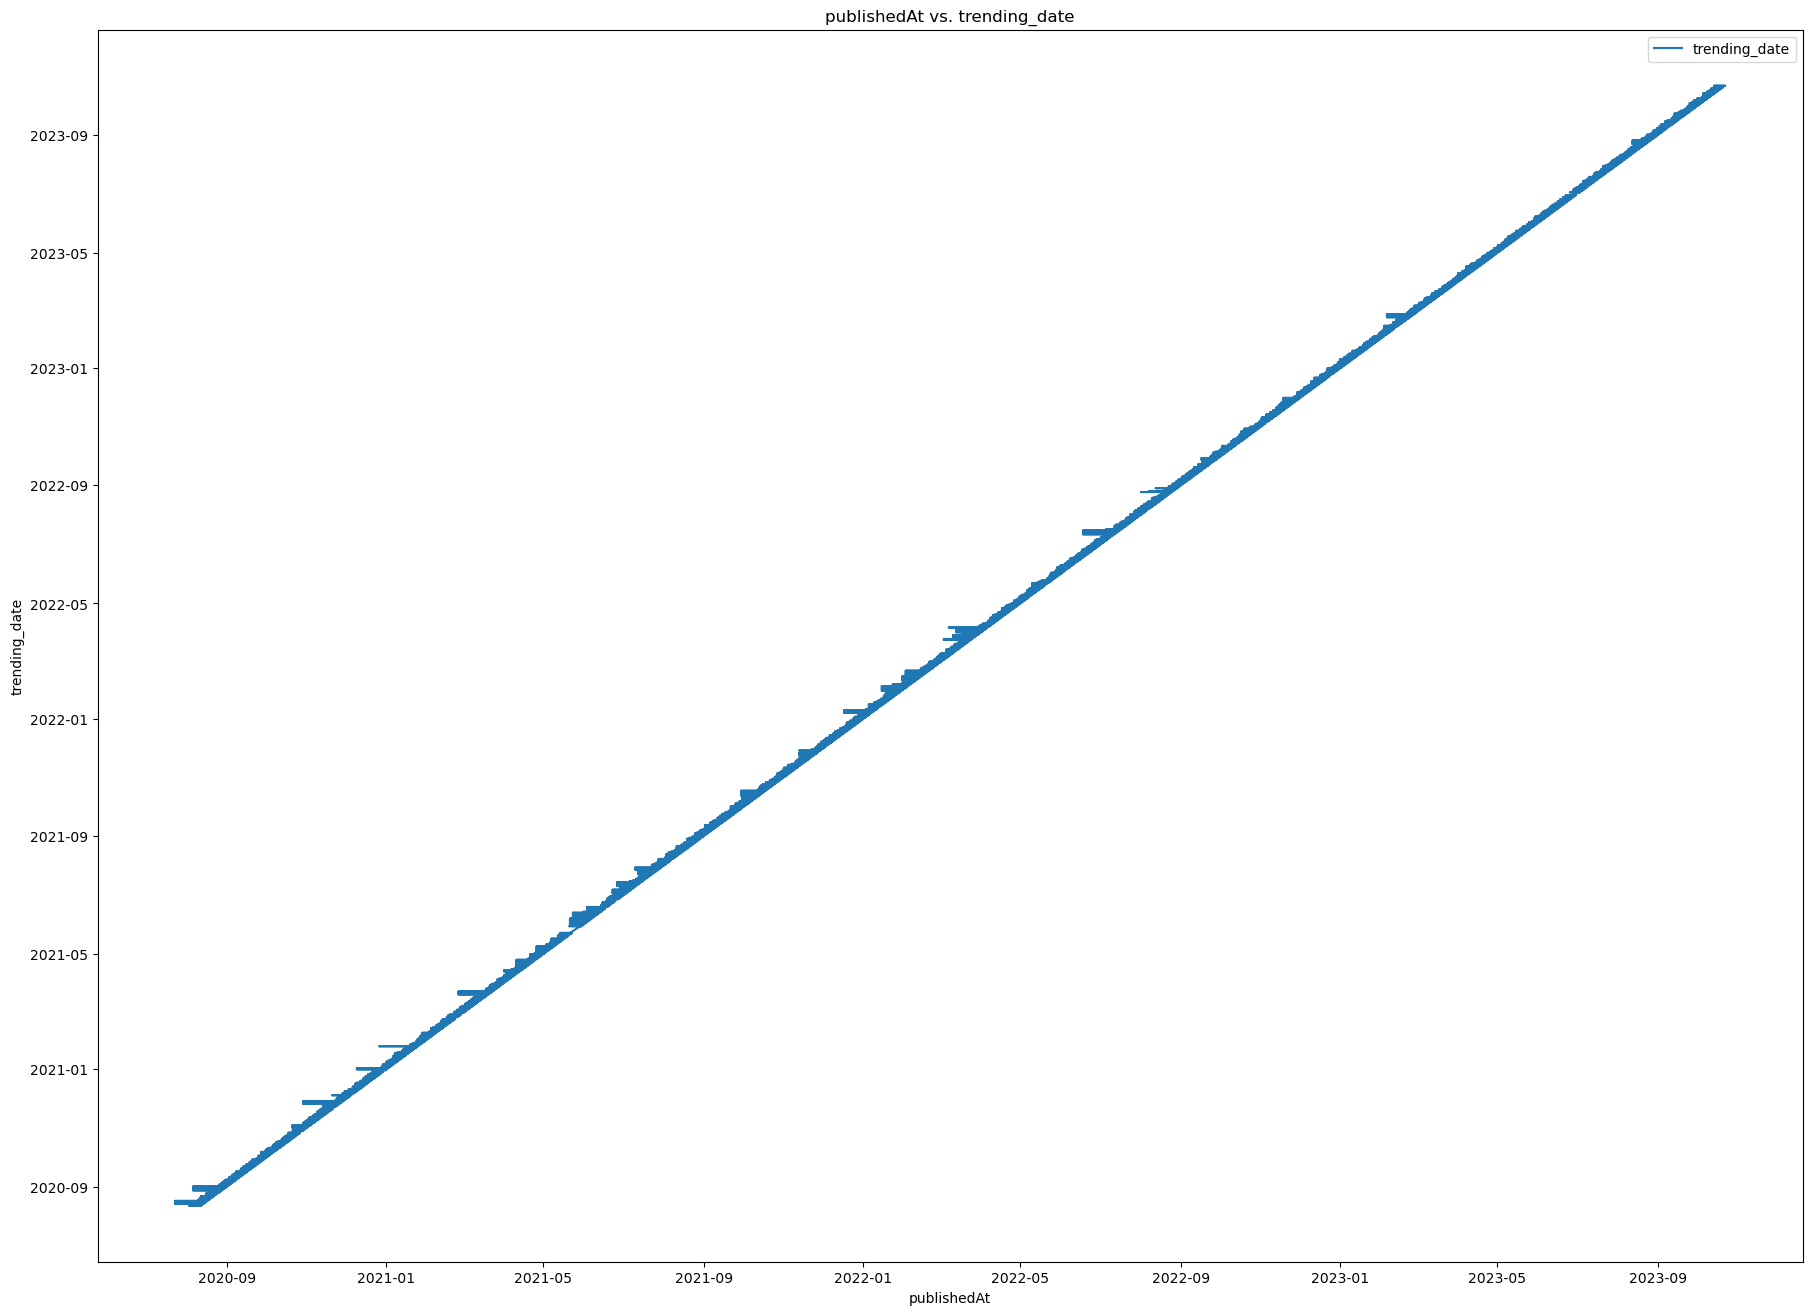

In [20]:
# Explore the data
plt.figure(figsize=(22, 16))
plt.plot(india_df['trending_date'], label='trending_date')
plt.xlabel('publishedAt')
plt.ylabel('trending_date')
plt.title('publishedAt vs. trending_date')
plt.legend()
plt.show()


In [21]:
# Resample the data to a yearly frequency

india_df_yearly = india_df.resample('Y').count() 


In [1]:
import statsmodels.api as sm

# Assuming 'views' is your time series variable
decomposition = sm.tsa.seasonal_decompose(india_df_resampled['views'], model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(22, 16))
plt.subplot(411)
plt.plot(india_df_resampled['views'], label='Original')
plt.legend()
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend()
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend()
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend()
plt.tight_layout()
plt.show()



NameError: name 'india_df_resampled' is not defined

In [ ]:
# Import Libraries
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model to the data
model = ARIMA(india_df_resampled['trending_date'], order=(5, 1, 0))
model_fit = model.fit()

# Make predictions
predictions = model_fit.predict(start=len(india_df_resampled), end=len(india_df_resampled) + 7, typ='levels')

# Plot the predictions
plt.plot(india_df_resampled['trending_date'], label='Observed')
plt.plot(predictions, label='Predicted', color='red')
plt.legend()
plt.show()



In [ ]:
# Analyse & Model
from statsmodels.tsa.arima_model import ARIMA

from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model to the data
model = ARIMA(india_df_resampled['trending_date'], order=(5, 1, 0))
model_fit = model.fit()

# Make predictions
predictions = model_fit.predict(start=len(india_df_resampled), end=len(india_df_resampled) + 7, typ='levels')


# Make predictions
predictions = model_fit.predict(start=len(india_df_resampled), end=len(india_df_resampled) + 7, typ='levels')

# Plot the predictions
plt.plot(india_df_resampled['trending_date'], label='Observed')
plt.plot(predictions, label='Predicted', color='red')
plt.legend()
plt.show()


# Correlation Analysis

In [ ]:
# import pandas as pd

# Sample data with columns: views, likes, dislikes, comment_count
data = {
    'views': [100, 200, 300, 400, 500],
    'likes': [10, 20, 30, 40, 50],
    'dislikes': [5, 10, 15, 20, 25],
    'comment_count': [2, 5, 8, 11, 14]
}

india_df = pd.DataFrame(data)

# Calculate the correlation matrix
correlation_matrix = india_df[['views', 'likes', 'dislikes', 'comment_count']].corr()

# Print the correlation matrix
print(correlation_matrix)


# Category Analysis

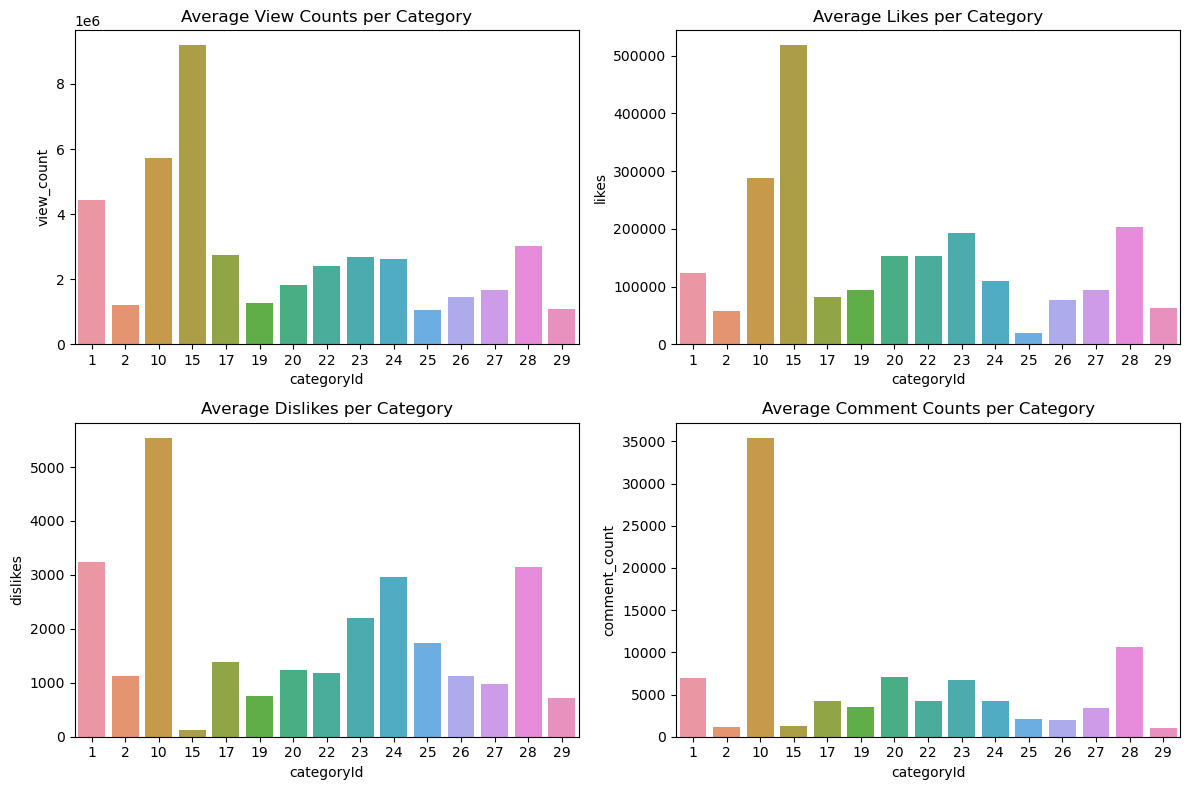

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data 
# Load the CSV file with the 'latin1' encoding
india_df = pd.read_csv('IN_youtube_trending_data.csv', encoding='latin1')

# Assuming your DataFrame has columns like 'views', 'likes', 'dislikes', 'comment_count', and 'categoryId'
# Adjust column names based on your actual DataFrame

# Group data by categoryId and calculate mean values
category_stats = india_df.groupby('categoryId').agg({
    'view_count': 'mean',
    'likes': 'mean',
    'dislikes': 'mean',
    'comment_count': 'mean'
}).reset_index()

# Visualize the data
plt.figure(figsize=(12, 8))

# Bar plot for average view counts per category
plt.subplot(2, 2, 1)
sns.barplot(x='categoryId', y='view_count', data=category_stats)
plt.title('Average View Counts per Category')

# Bar plot for average likes per category
plt.subplot(2, 2, 2)
sns.barplot(x='categoryId', y='likes', data=category_stats)
plt.title('Average Likes per Category')

# Bar plot for average dislikes per category
plt.subplot(2, 2, 3)
sns.barplot(x='categoryId', y='dislikes', data=category_stats)
plt.title('Average Dislikes per Category')

# Bar plot for average comment counts per category
plt.subplot(2, 2, 4)
sns.barplot(x='categoryId', y='comment_count', data=category_stats)
plt.title('Average Comment Counts per Category')

plt.tight_layout()
plt.show()


# Hypothesis Testing

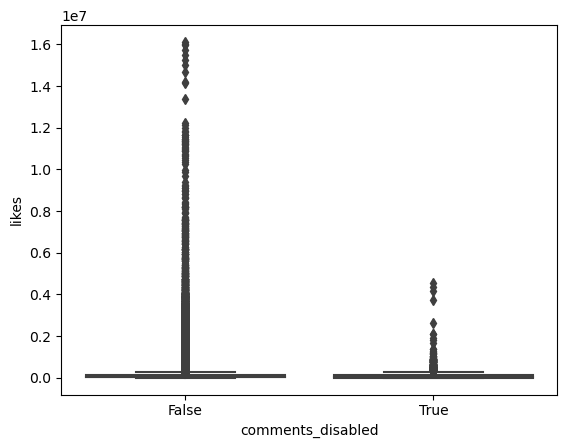

T-statistic: 1.4765600254487634
P-value: 0.13979503919731065


In [58]:
# importing libraries
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

#load Dataset
india_df = pd.read_csv('IN_youtube_trending_data.csv', encoding='latin1')

#Explore Data
# Display the first few rows of the dataset
india_df.head()

# Explore the summary statistics
india_df.describe()


#Visualize
# Visualize the data
sns.boxplot(x='comments_disabled', y='likes', data=india_df)
plt.show()
# Separate data into two groups: videos with comments enabled and videos with comments disabled
enabled_likes = india_df[india_df['comments_disabled'] == False]['likes']
disabled_likes = india_df[india_df['comments_disabled'] == True]['likes']

# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(enabled_likes, disabled_likes)

# Display the results
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')









# Visualization by scatterplot

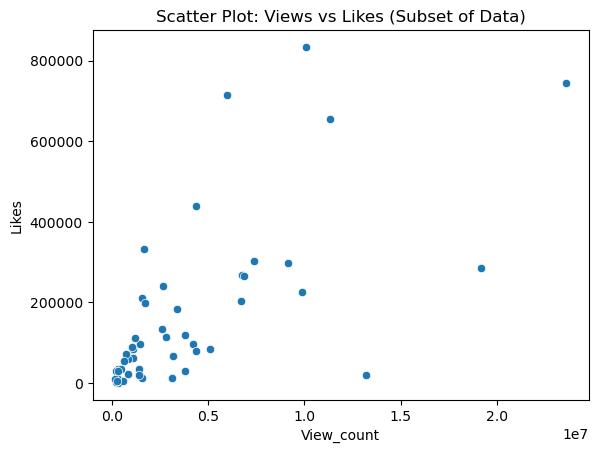

In [63]:
# importing modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load data
india_df = pd.read_csv('IN_youtube_trending_data.csv', encoding='latin1')

#sns.scatterplot(x='views', y='likes', data=df)
# Select a specific range of rows, for example, from row 0 to 49
subset_df = india_df.iloc[:50]

#visualize
sns.scatterplot(x='view_count', y='likes', data=subset_df)
plt.title('Scatter Plot: Views vs Likes (Subset of Data)')
plt.xlabel('View_count')
plt.ylabel('Likes')
plt.show()



# Box Plot

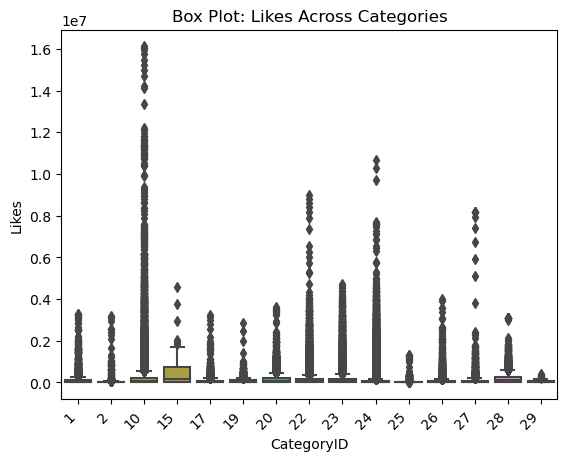

In [66]:
# importing modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load data
india_df = pd.read_csv('IN_youtube_trending_data.csv', encoding='latin1')

#sns.scatterplot(x='views', y='likes', data=df)
# Select a specific range of rows, for example, from row 0 to 49
subset_df = india_df.iloc[:50]

#visualize
sns.boxplot(x='categoryId', y='likes', data=india_df)
plt.title('Box Plot: Likes Across Categories')
plt.xlabel('CategoryID')
plt.ylabel('Likes')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


# Heat Map

C:\Users\tiwar\AppData\Local\Temp\ipykernel_5652\1158286515.py:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = india_df.corr()


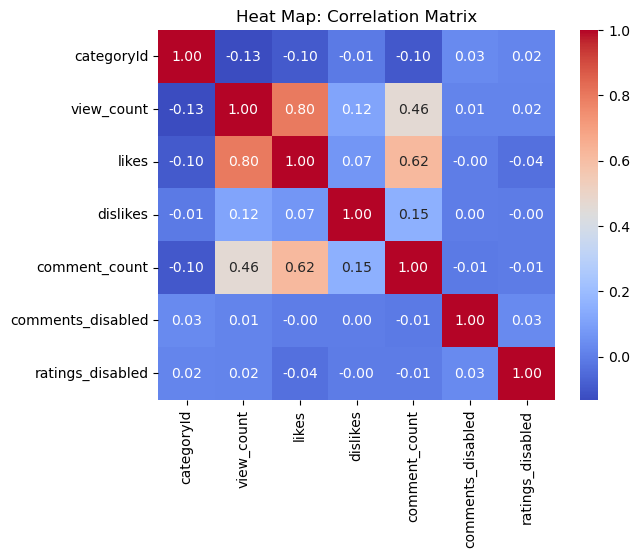

In [67]:
# importing modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load data
india_df = pd.read_csv('IN_youtube_trending_data.csv', encoding='latin1')

#sns.scatterplot(x='views', y='likes', data=df)
# Select a specific range of rows, for example, from row 0 to 49
subset_df = india_df.iloc[:50]

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heat Map: Correlation Matrix')
plt.show()


# Linear Regression

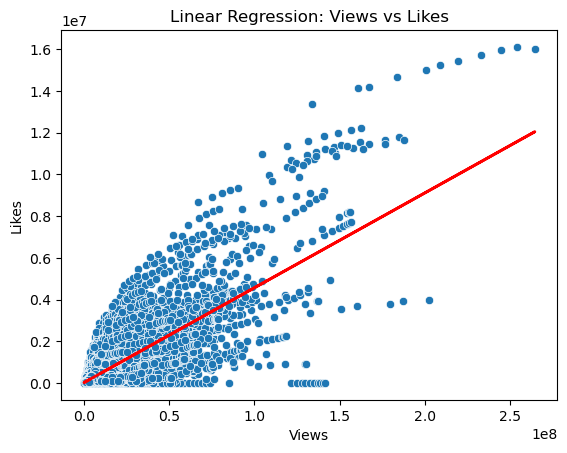

In [69]:
# importing modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load data
india_df = pd.read_csv('IN_youtube_trending_data.csv', encoding='latin1')

#sns.scatterplot(x='views', y='likes', data=df)
# Select a specific range of rows, for example, from row 0 to 49
subset_df = india_df.iloc[:50]

#visualization
# Assuming 'views' is the independent variable and 'likes' is the dependent variable
X = india_df[['view_count']]
y = india_df['likes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Plot the linear regression line on the scatter plot
sns.scatterplot(x='view_count', y='likes', data=india_df)
plt.plot(X, model.predict(X), color='red', linewidth=2)
plt.title('Linear Regression: Views vs Likes')
plt.xlabel('Views')
plt.ylabel('Likes')
plt.show()
